<a href="https://colab.research.google.com/github/au6usto/catdog_convolutional_network/blob/master/catdog_cn_mod_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar modelo y capas a usar

In [ ]:
import numpy as np
import pandas as pd 
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.preprocessing import image


Using TensorFlow backend.


# Conexión con el Dataset en GDrive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!mkdir ~/data
!p7zip -d '/content/drive/My Drive/dc.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/My Drive/                                  1 file, 671386308 bytes (641 MiB)

Extracting archive: /content/drive/My Drive/dc.7z
--
Path = /content/drive/My Drive/dc.7z
Type = 7z
Physical Size = 671386308
Headers Size = 206282
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 7        0% 7 - dogs-vs-cats (1)/test1/cat/10.jpg                                            0% 217 - dogs-vs-cats (1)/test1/cat/1345.jpg                                                1% 217 - dog

In [ ]:
!ls
!ls 'dogs-vs-cats (1)'
!ls 'dogs-vs-cats (1)/test1'
!ls 'dogs-vs-cats (1)/train'

'dogs-vs-cats (1)'   drive   sample_data
test1  train
cat  dog
cat  dog


# Carga de imagenes

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive') #Borrar

# dentro de train y test se debe tener una carpeta dog y una carpeta cat con
# las imagenes correspondiente

#Direccion de las carpetas de train y test
pathTrainGoogleDrive = "/content/dogs-vs-cats (1)/train"
pathTestGoogleDrive = "/content/dogs-vs-cats (1)/test1"

#Datos de entrenamiento y testeo rescala las imagenes
#Datos de entrenamiento
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)
#Datos de testeos
test_datagen = ImageDataGenerator(rescale = 1./255)

#Genera lotes de datos aumentados-> dataset
print('Train')
training_set = train_datagen.flow_from_directory(
  pathTrainGoogleDrive,
  target_size = (128, 128),
  batch_size = 32,
  class_mode = 'categorical'
)
print('test')
test_set = test_datagen.flow_from_directory(
  pathTestGoogleDrive,
  target_size = (128, 128),
  batch_size = 32,
  class_mode = 'categorical'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train
Found 25000 images belonging to 2 classes.
test
Found 5164 images belonging to 2 classes.


In [ ]:
x_train, y_train = next(training_set)

x_test, y_test = next(test_set)

# Normalización del dataset a rangos de 0 a 1
x_train = x_train/255
x_test = x_test/255

print('x_train:', x_train.shape, x_train.dtype, x_train.min(), x_train.max())
print('y_train', y_train.shape, y_train.dtype, y_train.min(), y_train.max())

x_train: (32, 128, 128, 3) float32 0.0 0.003921569
y_train (32, 2) float32 0.0 1.0


{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}


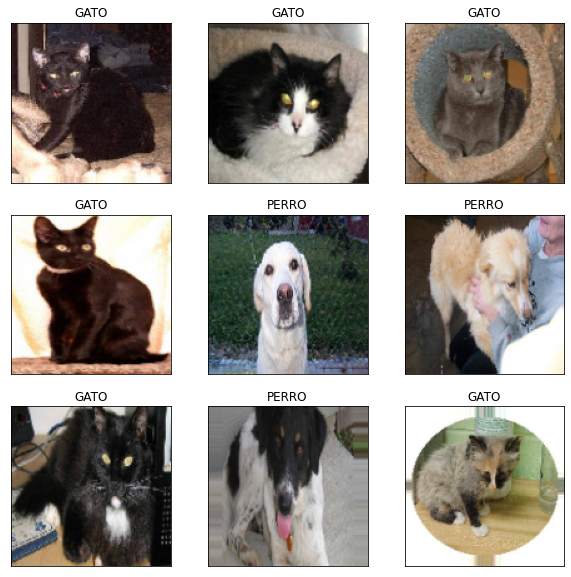

In [ ]:
#Visualize Data
print(training_set.class_indices) #{'cat': 0, 'dog': 1} #esta mál esta categorizacion
print(test_set.class_indices) #{'cat': 0, 'dog': 1} #esta mál esta categorizacion
plt.figure(figsize=(10,10)) #Tamaño de la imagen
for i in range(9):
    plt.subplot(3,3, i+1) #Sublpotea cada imagen en tres por tres a todas
    plt.xticks([]) #No muestra eje x
    plt.yticks([]) #No muestra eje y
    plt.grid(False)
    plt.imshow(x_train[i]*255) #Muestra imagen multiplicada por 255 por que estaba normalizada
    #plt.title(np.argmax(y_train[i])) #Por cada imagen muestra como titulo el indice de la categoria a la que pertenece
    output=np.argmax(y_train[i])
    if output==0:
      plt.title('GATO')
    else:
      plt.title('PERRO')

In [ ]:
####
# Dar formato one-hot
nclases = 2 
y_train = np_utils.to_categorical(y_train, nclases) 
y_test = np_utils.to_categorical(y_test, nclases)
y_train.shape
y_test.shape
print(y_train.shape)

(32, 2, 2, 2)


 # Definir el modelo

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Conv2D(512, (5, 5), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(256, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(2, activation = 'softmax'))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 124, 124, 512)     38912     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 512)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 58, 58, 256)       3277056   
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 128)       295040    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)       

# Entrenamiento

In [ ]:
# Definir optimizador, funcion de perdida y metrica

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = classifier.fit_generator(training_set,
 steps_per_epoch = 250, #250
 epochs = 90,#90
 validation_data = test_set,
 validation_steps = 62,
 workers=12,
 max_q_size=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=250, epochs=90, validation_data=<keras.pre..., validation_steps=62, workers=12, max_queue_size=100)`
  import sys


Epoch 1/90
250/250 [==============================] - 119s 478ms/step - loss: 0.6945 - accuracy: 0.4975 - val_loss: 0.6934 - val_accuracy: 0.4829
Epoch 2/90
250/250 [==============================] - 103s 414ms/step - loss: 0.6923 - accuracy: 0.5105 - val_loss: 0.6880 - val_accuracy: 0.5217
Epoch 3/90
250/250 [==============================] - 104s 417ms/step - loss: 0.6927 - accuracy: 0.5085 - val_loss: 0.6891 - val_accuracy: 0.5132
Epoch 4/90
250/250 [==============================] - 109s 435ms/step - loss: 0.6909 - accuracy: 0.5247 - val_loss: 0.6564 - val_accuracy: 0.5590
Epoch 5/90
250/250 [==============================] - 103s 412ms/step - loss: 0.6862 - accuracy: 0.5455 - val_loss: 0.6817 - val_accuracy: 0.5685
Epoch 6/90
250/250 [==============================] - 104s 416ms/step - loss: 0.6864 - accuracy: 0.5493 - val_loss: 0.6953 - val_accuracy: 0.4796
Epoch 7/90
250/250 [==============================] - 109s 435ms/step - loss: 0.6849 - accuracy: 0.5535 - val_loss: 0.6962 -

# Gráficas para ver desempeño de la CNN

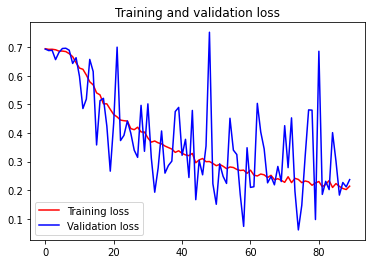

In [ ]:
# Grafica de errores de entramiento y validacion con respecto a iteraciones
#No modificar

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

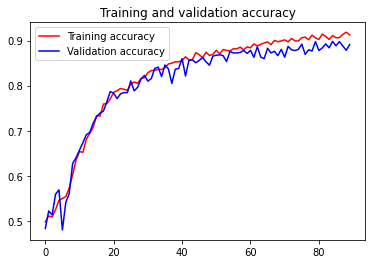

In [ ]:
# Grafica de aciertos de entramiento y validacion con respecto a iteraciones
#No modificar

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(accuracy))

plt.figure()

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [ ]:
#Guarda el modelo entrnado con los pesos correctos
classifier.save('ccnEntrenado2.h5') #modelo entrenado secuncial y toda su arquitectura

Cargar Imagen y Modelo para predecir


In [ ]:
import keras
model = keras.models.load_model('/content/ccnEntrenado2.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 124, 124, 512)     38912     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 512)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 58, 58, 256)       3277056   
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 128)       295040    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)       

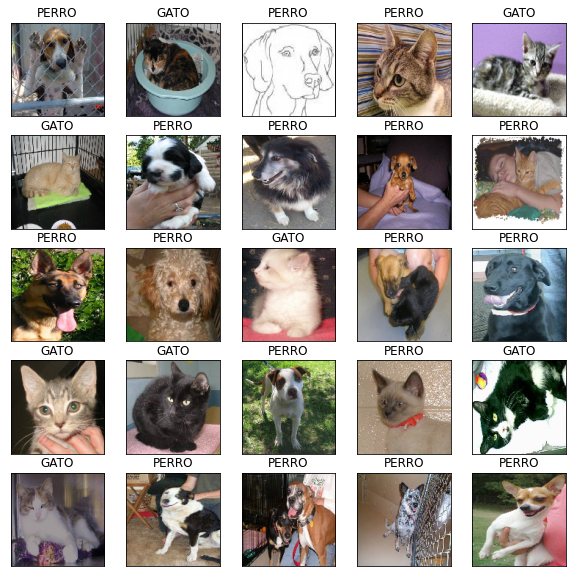

In [ ]:
x_test,y_test = next(test_set)

model_pred = model.predict(x_test)
model_predicted = np.argmax(model_pred, axis=1)

x_test = x_test/255
y_test = y_test/255

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i]*255)
    if model_predicted[i]==0:
      plt.title('GATO')
    else:
      plt.title('PERRO')

In [ ]:

#output = model.predict(imagen.reshape(1,128,128,3)) 

#from PIL import Image
#import numpy as np
#from skimage import transform
#import matplotlib.pyplot as plt
#from keras.preprocessing import image

#def load(filename):
#   np_image = Image.open(filename)
#   np_image = np.array(np_image).astype('float32')/255
#   np_image = transform.resize(np_image, (128, 128, 3))
#   np_image = np.expand_dims(np_image, axis=0)
#   return np_image

#image = load('/content/perro.jpg')
#img=display(image*255)
#plt.imshow(img)
#plt.show()
#output=model.predict(image.reshape(1,128,128,3))

#print(max(output[0])) # 0 por que es un array de un array, por eso agrego 0

#pred_class = np.argmax(output[0,:], axis=-1)

#argmax devuleve la posicion del mayor numero, el axis es opcional, por si tuviese una matriz de 3 por 3, aplasta y lo deja en un solo vecto
#print(pred_class)
#etiquetas = {0:'cat',1:'dog'} 
#print('Imagen ejemplo - Categoría: ' + str(etiquetas[pred_class]))
#print(output)


#imgPrueba = Image('/content/perro.jpg')
#plt.imshow(imgPrueba*255)
#print(training_set.class_indices) 
#plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
#plt.axis('off')